In [44]:
!pip install -q langchain_community replicate langchain

In [45]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.2-8b-instruct"
output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

In [46]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)   # Tampilkan semua kolom
pd.set_option('display.max_rows', 100)       # Batas maksimal baris

sns.set_theme(style="whitegrid")  # Style dasar dari Seaborn
plt.rcParams['figure.figsize'] = (8, 5)  # Ukuran default plot
plt.rcParams['axes.titlesize'] = 14      # Ukuran font judul
plt.rcParams['axes.labelsize'] = 12      # Ukuran font label


In [47]:
# Memuat dataset
file_path = 'depressionstudent.csv'
data = pd.read_csv(file_path)

In [48]:
# Melihat banyak baris dan kolom dalam dataset
data.shape

(502, 11)

In [49]:
# Melihat 5 baris awal dari dataset
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [50]:
# Melihat tipe data setiap kolom
data.dtypes

,0
Gender,object
Age,int64
Academic Pressure,float64
Study Satisfaction,float64
Sleep Duration,object
Dietary Habits,object
Have you ever had suicidal thoughts ?,object
Study Hours,int64
Financial Stress,int64
Family History of Mental Illness,object


In [51]:
# Informasi dasar tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [52]:
# Statistik ringkasan dari dataset
data.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


Preprocessing Data / Data Cleaning

Memeriksa apakah ada data yang hilang dan menangani nilai kosong (missing values). Mendeteksi Outliers Menghapus kolom/baris yang memiliki banyak nilai kosong (missing values). Mengisi nilai kosong dengan nilai tertentu seperti median atau rata-rata (missing values). Menghapus kolom-kolom yang tidak dibutuhkan

In [53]:
# Memeriksa kolom dalam dataset
data.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [54]:
# Melihat 5 baris terakhir dari data
data.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes


In [55]:
# Mengecek missing values
data.isna().sum() # Hasil 0 berarti tidak ada missing values

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [56]:
# Mengecek apakah ada data yang duplikat
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
497,False
498,False
499,False
500,False


In [57]:
# Menemukan lokasi data duplikat
data.loc[data.duplicated()]

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [58]:
# Pilih kolom numerik untuk dianalisis
numeric_columns = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']

Melakukan Analisis Statistik Deskriptif

In [59]:
# Memilih kolom numerik untuk analisis statistik
numerical_columns = ['Age', 'Academic Pressure', 'Study Satisfaction',
                     'Study Hours', 'Financial Stress']

# Statistik deskriptif: mean, median, std, dll.
statistics = data[numerical_columns].describe(percentiles=[0.25, 0.5, 0.75]).T

# Menghitung mode untuk setiap kolom numerik
mode_values = data[numerical_columns].mode().iloc[0]

# Menambahkan nilai mode ke statistik
statistics['mode'] = mode_values

# Menampilkan statistik
statistics

,count,mean,std,min,25%,50%,75%,max,mode
Age,502.0,26.241036,4.896501,18.0,22.0,26.5,30.0,34.0,28.0
Academic Pressure,502.0,3.003984,1.390007,1.0,2.0,3.0,4.0,5.0,3.0
Study Satisfaction,502.0,3.075697,1.373490,1.0,2.0,3.0,4.0,5.0,4.0
Study Hours,502.0,6.404382,3.742434,0.0,3.0,7.0,10.0,12.0,10.0
Financial Stress,502.0,2.928287,1.425053,1.0,2.0,3.0,4.0,5.0,1.0


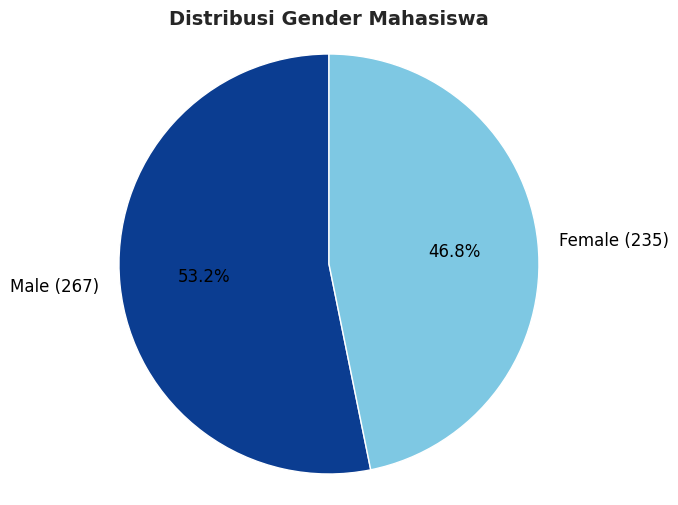

In [60]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    gender_counts,
    labels=[f"{label} ({count})" for label, count in zip(gender_counts.index, gender_counts)],
    autopct='%1.1f%%',
    colors=['#0B3D91', '#7EC8E3'],  # Biru tua & biru muda
    startangle=90,
    textprops={'fontsize': 12, 'color': 'black'}
)

plt.title('Distribusi Gender Mahasiswa', fontsize=14, fontweight='bold')
plt.axis('equal')  # Pastikan bentuknya bulat sempurna
plt.show()


Distribusi Gender Mahasiswa

Laki-laki: 267 orang (53,2%)

Perempuan: 235 orang (46,8%)
→ Jumlah mahasiswa laki-laki sedikit lebih banyak daripada perempuan.

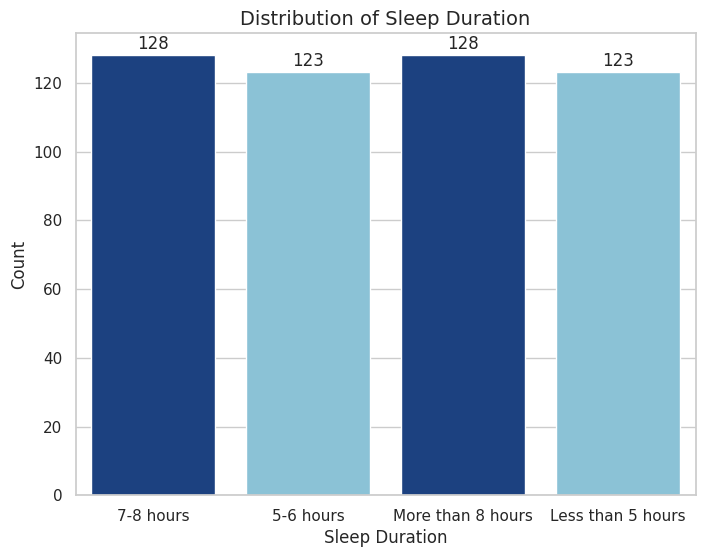

In [61]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Sleep Duration',
    palette=['#0B3D91', '#7EC8E3']  # biru tua & biru muda
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Sleep Duration', fontsize=14)
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Distribusi Durasi Tidur

7–8 jam: 128 orang

5–6 jam: 123 orang

Lebih dari 8 jam: 128 orang

Kurang dari 5 jam: 123 orang
→ Durasi tidur terdistribusi cukup merata di semua kategori.

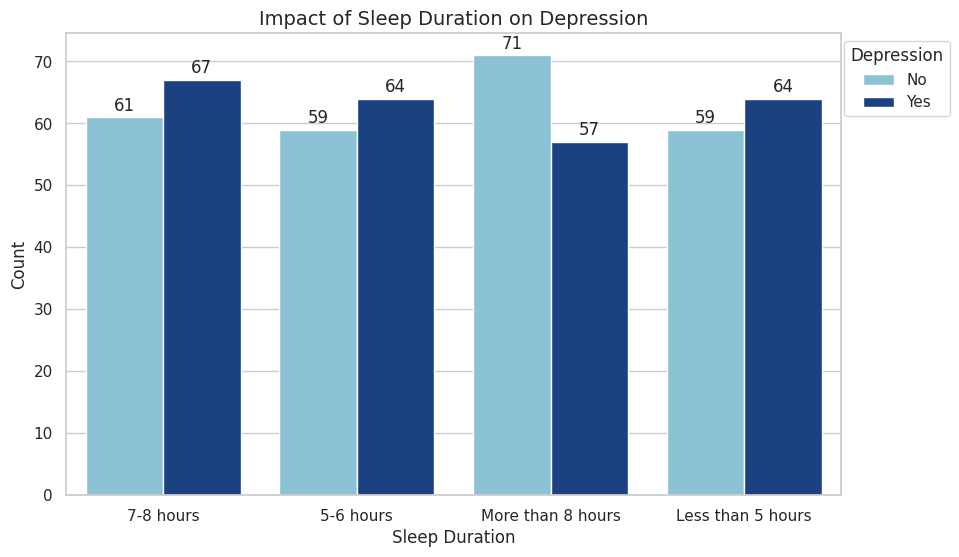

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x='Sleep Duration',
    hue='Depression',
    palette={'Yes': '#0B3D91',  # biru tua
             'No': '#7EC8E3'}   # biru muda
)

# Menambahkan label pada setiap batang
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Impact of Sleep Duration on Depression', fontsize=14)
plt.xlabel('Sleep Duration', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Depression', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


Pengaruh Durasi Tidur terhadap Depresi

7–8 jam: lebih banyak yang depresi (67) daripada tidak depresi (61).

5–6 jam: sedikit lebih banyak depresi (64) daripada tidak depresi (59).

Lebih dari 8 jam: lebih banyak yang tidak depresi (71) dibanding depresi (57).

Kurang dari 5 jam: lebih banyak yang depresi (64) dibanding tidak depresi (59).
→ Durasi tidur >8 jam cenderung berkaitan dengan tingkat depresi lebih rendah.

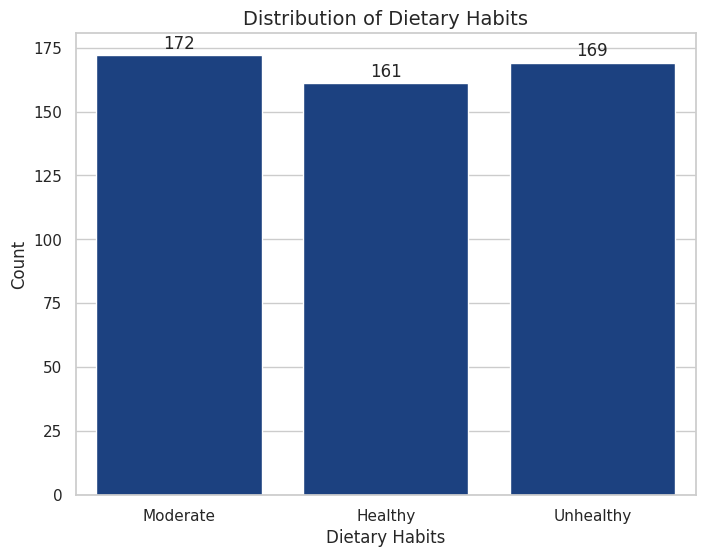

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Dietary Habits',
    color='#0B3D91'  # semua bar jadi satu warna
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Dietary Habits', fontsize=14)
plt.xlabel('Dietary Habits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Visualisasi menunjukkan bahwa kebiasaan makan mahasiswa terbagi menjadi tiga kategori, yaitu moderate, healthy, dan unhealthy. Kategori moderate mendominasi dengan 172 responden, diikuti unhealthy sebanyak 169 responden, dan healthy sebanyak 161 responden. Perbedaan jumlah antar kategori relatif kecil, namun terlihat bahwa proporsi mahasiswa dengan pola makan sehat berada pada posisi terendah. Hal ini dapat menjadi indikator bahwa mayoritas mahasiswa belum sepenuhnya menerapkan pola makan yang optimal untuk mendukung kesehatan fisik dan mental.

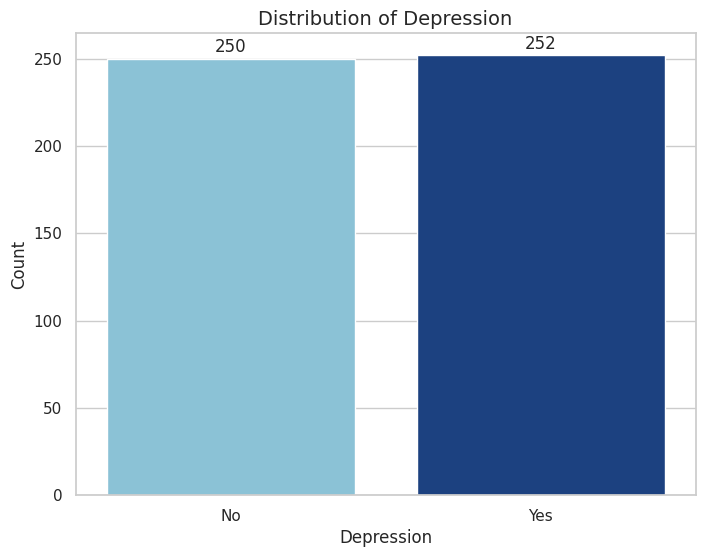

In [64]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Depression',
    palette={'Yes': '#0B3D91', 'No': '#7EC8E3'}
)

for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Distribution of Depression', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Visualisasi ini menunjukkan distribusi status depresi pada mahasiswa. Jumlah mahasiswa yang mengalami depresi (252 responden) sedikit lebih tinggi dibandingkan yang tidak mengalami depresi (250 responden). Selisih yang tipis ini mengindikasikan bahwa tingkat depresi di kalangan mahasiswa cukup tinggi dan hampir setengah dari populasi mengalami kondisi tersebut. Hal ini menandakan perlunya perhatian khusus terhadap faktor-faktor yang memengaruhi kesehatan mental mahasiswa.

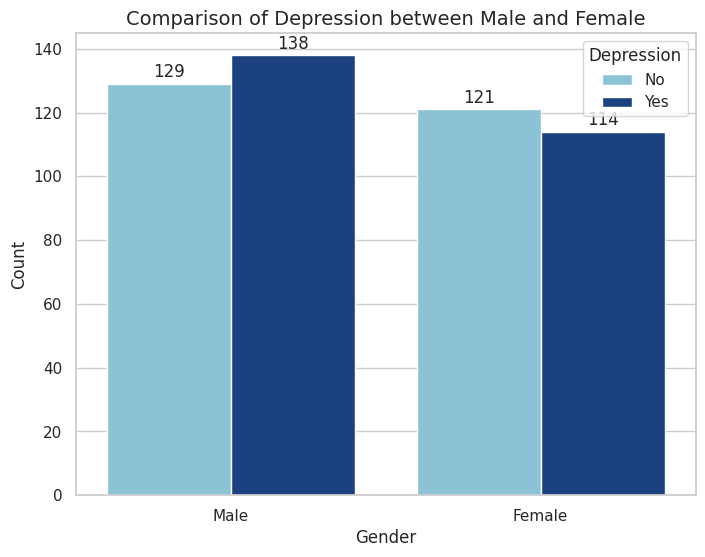

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=data,
    x='Gender',
    hue='Depression',
    palette={'Yes': '#0B3D91', 'No': '#7EC8E3'}
)

# Menambahkan label pada setiap batang
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)

plt.title('Comparison of Depression between Male and Female', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Depression', loc='upper right')
plt.show()

Visualisasi ini membandingkan tingkat depresi antara mahasiswa laki-laki dan perempuan. Pada kelompok laki-laki, jumlah yang mengalami depresi (138 responden) lebih tinggi dibandingkan yang tidak depresi (129 responden). Sebaliknya, pada kelompok perempuan, jumlah yang tidak mengalami depresi (121 responden) sedikit lebih banyak dibandingkan yang depresi (114 responden). Data ini menunjukkan bahwa prevalensi depresi lebih tinggi pada mahasiswa laki-laki dibandingkan perempuan dalam populasi penelitian ini.

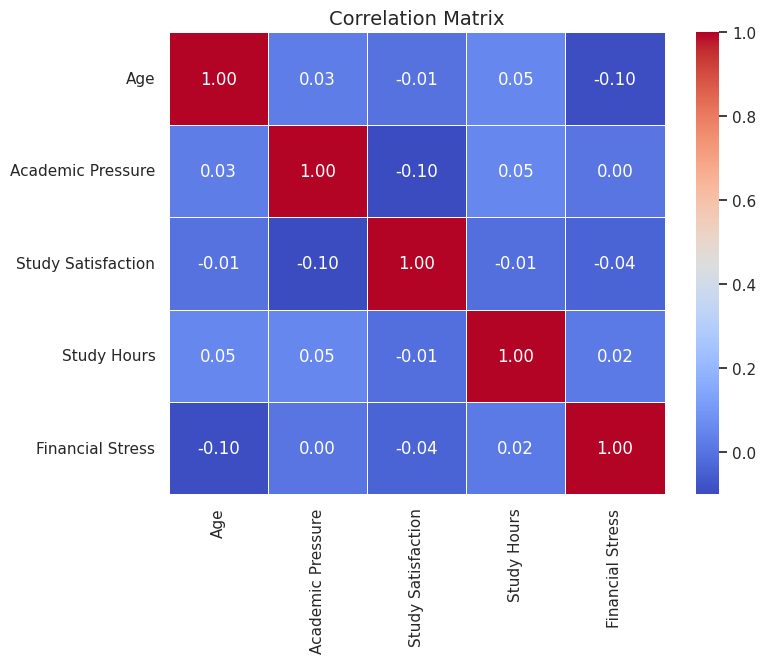

In [66]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Matriks Korelasi

*  Korelasi antar variabel relatif lemah (mendekati nol), menandakan tidak ada
hubungan linear yang kuat di antara variabel-variabel yang diamati.
*  Tekanan akademik memiliki korelasi negatif kecil dengan kepuasan belajar (-0.10), menunjukkan bahwa semakin tinggi tekanan akademik, kepuasan belajar cenderung sedikit menurun.
*  Stres finansial memiliki korelasi negatif kecil dengan usia (-0.10), artinya mahasiswa yang lebih muda cenderung mengalami stres finansial sedikit lebih tinggi.

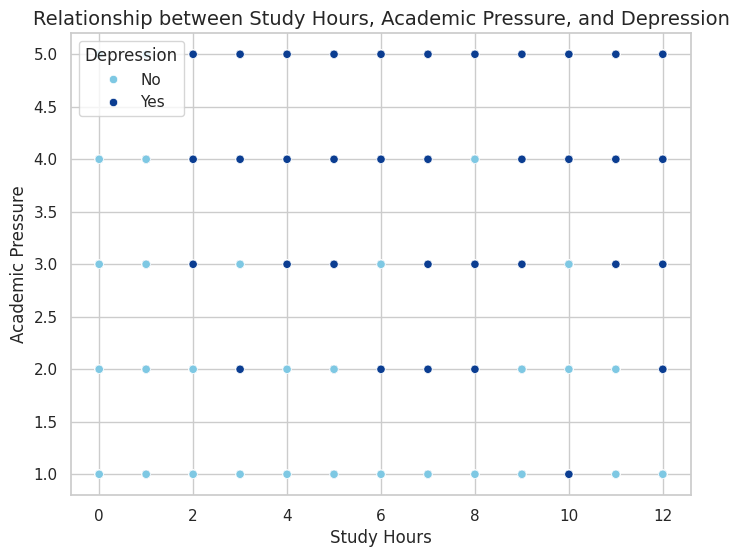

In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Study Hours', y='Academic Pressure', hue='Depression', palette={'Yes': '#0B3D91', 'No': '#7EC8E3'})
plt.title('Relationship between Study Hours, Academic Pressure, and Depression', fontsize=14)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Academic Pressure', fontsize=12)
plt.show()

Hubungan Jam Belajar, Tekanan Akademik, dan Depresi


*   Mahasiswa dengan tekanan akademik tinggi (skor 4–5) cenderung lebih banyak  mengalami depresi, terlepas dari jumlah jam belajar.
*   Depresi tidak hanya terjadi pada mahasiswa dengan jam belajar tinggi, tetapi juga pada mereka yang memiliki jam belajar rendah jika tekanan akademiknya tinggi.
*  Jam belajar saja tidak menunjukkan pola hubungan yang kuat dengan depresi tanpa mempertimbangkan faktor tekanan akademik.